In [1]:
import pandas as pd
import numpy as np

In [2]:
#Load CSV into DataFrame
df = pd.read_csv('diabetes_dataset.csv')

In [3]:
#Dataset size
df.shape

(243532, 24)

In [4]:
#Preview data
df.head()

,ID,BMI,PhysHlth,Age,HighBP,HighChol,CholCheck,Smoker,Stroke,HeartDiseaseorAttack,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,DiffWalk,Sex,Education,Income,Diabetes_binary,source
0,114414,29,0,65 to 69,0,1,1,0,0,0,...,1,1,Poor,0,0,0,6,7,Non-Diabetic,train
1,168896,32,0,80 or older,1,1,1,0,0,0,...,1,0,Poor,0,0,0,Some College Degree,4,Non-Diabetic,train
2,68354,25,5,65 to 69,1,0,1,1,0,0,...,1,0,Fair,0,0,1,6,2,Non-Diabetic,train
3,121194,24,0,80 or older,1,0,1,0,0,0,...,1,0,Very Good,0,1,0,Advanced Degree,5,Non-Diabetic,train
4,141150,31,0,25 to 29,0,0,1,0,0,1,...,1,0,Very Good,5,0,0,6,6,Diabetic,train


In [5]:
#List columns
df.columns.tolist()

['ID',
 'BMI',
 'PhysHlth',
 'Age',
 'HighBP',
 'HighChol',
 'CholCheck',
 'Smoker',
 'Stroke',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'Fruits',
 'Veggies',
 'HvyAlcoholConsump',
 'AnyHealthcare',
 'NoDocbcCost',
 'GenHlth',
 'MentHlth',
 'DiffWalk',
 'Sex',
 'Education',
 'Income',
 'Diabetes_binary',
 'source']

In [6]:
#Check data types and count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243532 entries, 0 to 243531
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   ID                    243532 non-null  int64 
 1   BMI                   243532 non-null  int64 
 2   PhysHlth              243532 non-null  int64 
 3   Age                   243532 non-null  object
 4   HighBP                243532 non-null  int64 
 5   HighChol              243532 non-null  int64 
 6   CholCheck             243532 non-null  int64 
 7   Smoker                243532 non-null  int64 
 8   Stroke                243532 non-null  int64 
 9   HeartDiseaseorAttack  243532 non-null  int64 
 10  PhysActivity          243532 non-null  int64 
 11  Fruits                243532 non-null  int64 
 12  Veggies               243532 non-null  int64 
 13  HvyAlcoholConsump     243532 non-null  int64 
 14  AnyHealthcare         243532 non-null  int64 
 15  NoDocbcCost      

In [7]:
#Count missing values per column
missing = df.isna().sum().sort_values(ascending=False)
missing.head(24)

ID                      0
BMI                     0
Diabetes_binary         0
Income                  0
Education               0
Sex                     0
DiffWalk                0
MentHlth                0
GenHlth                 0
NoDocbcCost             0
AnyHealthcare           0
HvyAlcoholConsump       0
Veggies                 0
Fruits                  0
PhysActivity            0
HeartDiseaseorAttack    0
Stroke                  0
Smoker                  0
CholCheck               0
HighChol                0
HighBP                  0
Age                     0
PhysHlth                0
source                  0
dtype: int64

In [8]:
#Check total missing values
df.isna().sum().sum()

np.int64(0)

In [9]:
#Drop non-informative columns
df = df.drop(columns=['ID', 'source'])

In [10]:
#Encode target variable
df['Diabetes_binary'] = df['Diabetes_binary'].map({'Non-Diabetic': 0, 'Diabetic': 1})

In [11]:
#Encode general health (ordinal)
genhlth_map = {
    'Excellent': 1, 
    'Very Good': 2, 
    'Good': 3, 
    'Fair': 4, 
    'Poor': 5
}
df['GenHlth'] = df['GenHlth'].map(genhlth_map)

In [12]:
#Unique age group values (sorted)
sorted(df['Age'].dropna().unique())

['18 to 24',
 '25 to 29',
 '30 to 34',
 '35 to 39',
 '40 to 44',
 '45 to 49',
 '50 to 54',
 '55 to 59',
 '60 to 64',
 '65 to 69',
 '70 to 74',
 '75 to 79',
 '80 or older']

In [13]:
#Unique education values and their counts
df['Education'].value_counts()

Education
6                        103087
Advanced Degree           67045
Some College Degree       60260
High School                9095
Elementary                 3873
Never Attended School       172
Name: count, dtype: int64

In [14]:
#Check data types in education values
df['Education'].apply(type).value_counts()

Education
<class 'str'>    243532
Name: count, dtype: int64

In [15]:
#Encode age groups with explicit order
age_map = {
    '18 to 24': 0,
    '25 to 29': 1,
    '30 to 34': 2,
    '35 to 39': 3,
    '40 to 44': 4,
    '45 to 49': 5,
    '50 to 54': 6,
    '55 to 59': 7,
    '60 to 64': 8,
    '65 to 69': 9,
    '70 to 74': 10,
    '75 to 79': 11,
    '80 or older': 12
}
df['Age'] = df['Age'].map(age_map)

In [16]:
#Encode education levels (ordinal, unified)
education_map = {
    'Never Attended School': 1,
    'Elementary': 2,
    'High School': 3,
    'Some College Degree': 4,
    'Advanced Degree': 5,
    '6': 5
}
df['Education'] = df['Education'].map(education_map)

In [17]:
#Check for NaN values after encoding
df['Age'].isna().sum(), df['Education'].isna().sum()

(np.int64(0), np.int64(0))

In [18]:
#Check final age value distribution
df['Age'].value_counts().sort_index()

Age
0      5454
1      7282
2     10685
3     13257
4     15527
5     19027
6     25263
7     29630
8     31933
9     30910
10    22580
11    15316
12    16668
Name: count, dtype: int64

In [19]:
#Check final education value distribution
df['Education'].value_counts().sort_index()

Education
1       172
2      3873
3      9095
4     60260
5    170132
Name: count, dtype: int64

In [20]:
#Flag unknown income responses
df['Income_Unknown'] = df['Income'].isin([9, 10]).astype(int)

In [21]:
#Remove false numeric meaning for unknown income
df.loc[df['Income_Unknown'] == 1, 'Income'] = np.nan

In [22]:
#Check final income value distribution (including NaN)
df['Income'].value_counts(dropna=False).sort_index()

Income
1.0     9403
2.0    11299
3.0    15349
4.0    19319
5.0    24865
6.0    35040
7.0    41505
8.0    86752
Name: count, dtype: int64

In [23]:
#Check if any unknown income responses exist
df['Income_Unknown'].value_counts()

Income_Unknown
0    243532
Name: count, dtype: int64

In [24]:
#Separate features and target
X = df.drop(columns=['Diabetes_binary'])
y = df['Diabetes_binary']

In [25]:
#Final shape check
X.shape, y.shape

((243532, 22), (243532,))

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [28]:
# Check split sizes
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((194825, 22), (48707, 22), (194825,), (48707,))

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
#Create logistic regression model
log_reg = LogisticRegression(max_iter=1000,  solver='lbfgs')

In [31]:
#Train the model
log_reg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [32]:
#Predict class labels
y_pred_lr = log_reg.predict(X_test)

In [33]:
# Predict probabilities
y_prob_lr = log_reg.predict_proba(X_test)[:, 1]

In [34]:
from sklearn.metrics import accuracy_score, classification_report

In [35]:
#Accuracy
acc_lr = accuracy_score(y_test, y_pred_lr)
print("Accuracy:", acc_lr)

Accuracy: 0.8633461309462706


In [36]:
#Detailed classification report
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.88      0.98      0.92     41921
           1       0.53      0.15      0.24      6786

    accuracy                           0.86     48707
   macro avg       0.71      0.57      0.58     48707
weighted avg       0.83      0.86      0.83     48707



In [37]:
from sklearn.metrics import roc_auc_score

In [38]:
#ROC-AUC score
roc_auc_lr = roc_auc_score(y_test, y_prob_lr)
print("Logistic Regression ROC-AUC:", roc_auc_lr)

Logistic Regression ROC-AUC: 0.82364460419365


In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
#Confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)
cm

array([[41004,   917],
       [ 5739,  1047]])

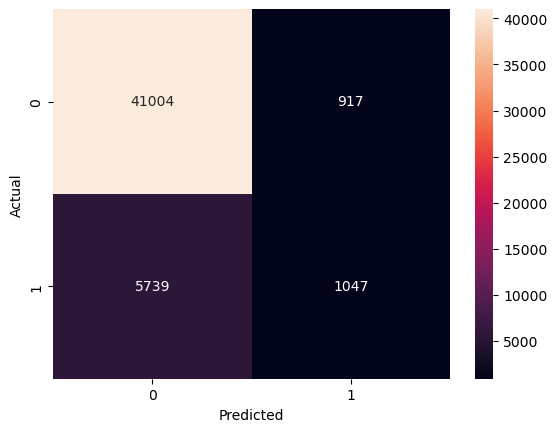

In [41]:
#Plot confusion matrix
plt.figure()
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
#Logistic Regression with class balancing
log_reg_bal = LogisticRegression(max_iter=1000,  solver='lbfgs', class_weight='balanced')

In [44]:
#Train the balanced model
log_reg_bal.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [45]:
#Predict class labels
y_pred_lr_bal = log_reg_bal.predict(X_test)

In [46]:
#Predict probabilities
y_prob_lr_bal = log_reg_bal.predict_proba(X_test)[:, 1]

In [47]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [48]:
#Accuracy 
acc_lr_bal = accuracy_score(y_test, y_pred_lr_bal)
print("Balanced Logistic Regression Accuracy:", acc_lr_bal)

Balanced Logistic Regression Accuracy: 0.7336933089699632


In [49]:
# Classification report
print(classification_report(y_test, y_pred_lr_bal))

              precision    recall  f1-score   support

           0       0.95      0.73      0.82     41921
           1       0.31      0.77      0.45      6786

    accuracy                           0.73     48707
   macro avg       0.63      0.75      0.64     48707
weighted avg       0.86      0.73      0.77     48707



In [50]:
#ROC-AUC score
roc_auc_lr_bal = roc_auc_score(y_test, y_prob_lr_bal)
print("Balanced Logistic Regression ROC-AUC:", roc_auc_lr_bal)

Balanced Logistic Regression ROC-AUC: 0.8242273389578378


In [51]:
# Confusion matrix
cm_bal = confusion_matrix(y_test, y_pred_lr_bal)
cm_bal

array([[30524, 11397],
       [ 1574,  5212]])

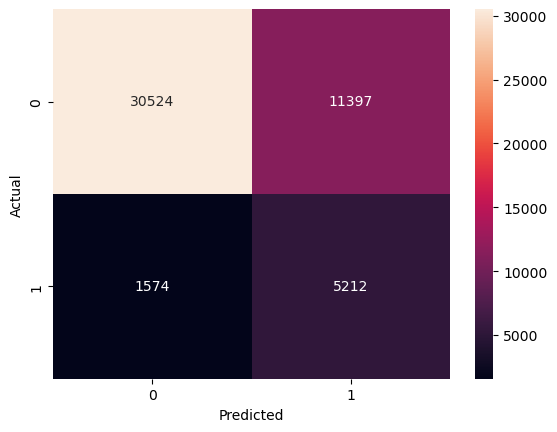

In [52]:
#Plot confusion matrix
plt.figure()
sns.heatmap(cm_bal, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [53]:
from sklearn.neighbors import KNeighborsClassifier

In [54]:
#Create KNN model
knn = KNeighborsClassifier(n_neighbors=5)

In [55]:
#Train KNN model
knn.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [56]:
#Predictions 
y_pred_knn = knn.predict(X_test)
y_prob_knn = knn.predict_proba(X_test)[:, 1]

In [57]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

In [58]:
#Accuracy
acc_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", acc_knn)

KNN Accuracy: 0.8473525365963824


In [59]:
#Classification report
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91     41921
           1       0.40      0.19      0.26      6786

    accuracy                           0.85     48707
   macro avg       0.64      0.57      0.59     48707
weighted avg       0.81      0.85      0.82     48707



In [60]:
#Confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_knn

array([[39976,  1945],
       [ 5490,  1296]])

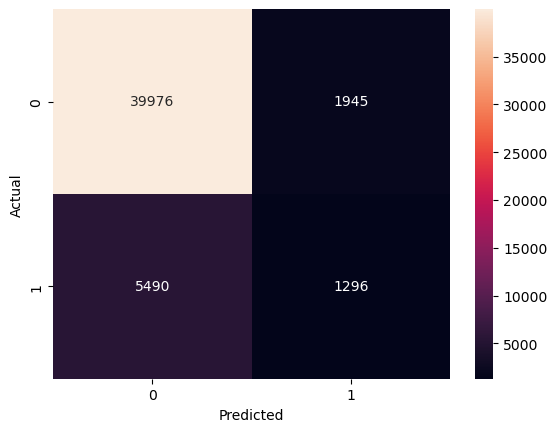

In [61]:
#Plot confusion matrix
plt.figure()
sns.heatmap(cm_knn, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [62]:
#ROC-AUC score
roc_auc_knn = roc_auc_score(y_test, y_prob_knn)
print("KNN ROC-AUC:", roc_auc_knn)

KNN ROC-AUC: 0.7147026715155272


In [63]:
from sklearn.tree import DecisionTreeClassifier

In [64]:
#Create Decision Tree model 
dt = DecisionTreeClassifier(max_depth=5, random_state=42)

In [65]:
#Train model 
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [66]:
#Predictions 
y_pred_dt = dt.predict(X_test)
y_prob_dt = dt.predict_proba(X_test)[:, 1]

In [67]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

In [68]:
#Accuracy 
acc_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", acc_dt)

Decision Tree Accuracy: 0.8659535590366888


In [69]:
#Classification report
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93     41921
           1       0.58      0.14      0.23      6786

    accuracy                           0.87     48707
   macro avg       0.73      0.56      0.58     48707
weighted avg       0.83      0.87      0.83     48707



In [70]:
#Confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
cm_dt

array([[41217,   704],
       [ 5825,   961]])

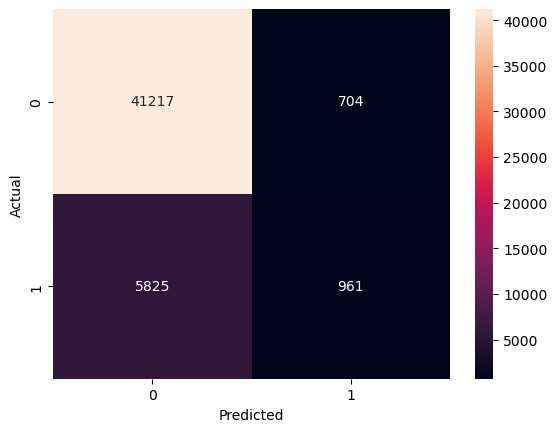

In [71]:
#Plot confusion matrix
plt.figure()
sns.heatmap(cm_dt, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [72]:
#ROC-AUC score
roc_auc_dt = roc_auc_score(y_test, y_prob_dt)
print("Decision Tree ROC-AUC:", roc_auc_dt)

Decision Tree ROC-AUC: 0.8083866687817141


In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
#Create Random Forest model
rf = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42)

In [75]:
#Train model
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,8
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [76]:
#Predictions
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

In [77]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

In [78]:
#Accuracy
acc_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", acc_rf)

Random Forest Accuracy: 0.8645779867370194


In [79]:
#Classification report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93     41921
           1       0.65      0.06      0.11      6786

    accuracy                           0.86     48707
   macro avg       0.76      0.53      0.52     48707
weighted avg       0.84      0.86      0.81     48707



In [80]:
#Confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_rf

array([[41709,   212],
       [ 6384,   402]])

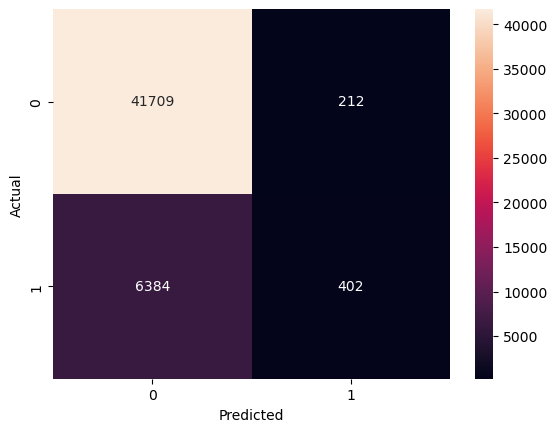

In [81]:
#Plot confusion matrix
plt.figure()
sns.heatmap(cm_rf, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [82]:
#ROC-AUC score
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)
print("Random Forest ROC-AUC:", roc_auc_rf)

Random Forest ROC-AUC: 0.8250307936447876


In [83]:
#Create balanced Random Forest model
rf_bal = RandomForestClassifier(n_estimators=100, max_depth=8, class_weight='balanced', random_state=42)

In [84]:
#Train model
rf_bal.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,8
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [85]:
#Predictions
y_pred_rf_bal = rf_bal.predict(X_test)
y_prob_rf_bal = rf_bal.predict_proba(X_test)[:, 1]

In [86]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

In [87]:
#Accuracy
acc_rf_bal = accuracy_score(y_test, y_pred_rf_bal)
print("Balanced Random Forest Accuracy:", acc_rf_bal)

Balanced Random Forest Accuracy: 0.729012256965118


In [88]:
#Classification report
print(classification_report(y_test, y_pred_rf_bal))

              precision    recall  f1-score   support

           0       0.95      0.72      0.82     41921
           1       0.31      0.78      0.45      6786

    accuracy                           0.73     48707
   macro avg       0.63      0.75      0.63     48707
weighted avg       0.86      0.73      0.77     48707



In [89]:
#Confusion matrix
cm_rf_bal = confusion_matrix(y_test, y_pred_rf_bal)
cm_rf_bal

array([[30211, 11710],
       [ 1489,  5297]])

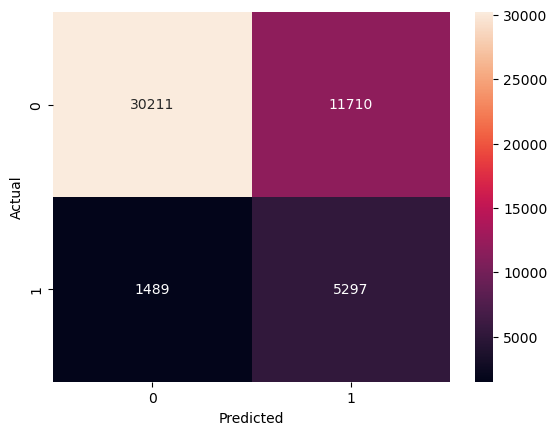

In [90]:
#Plot confusion matrix
plt.figure()
sns.heatmap(cm_rf_bal, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [91]:
#ROC-AUC score
roc_auc_rf_bal = roc_auc_score(y_test, y_prob_rf_bal)
print("Balanced Random Forest ROC-AUC:", roc_auc_rf_bal)

Balanced Random Forest ROC-AUC: 0.8266695141485901


In [92]:
from xgboost import XGBClassifier

In [93]:
#Calculate class imbalance ratio for XGBoost
neg, pos = np.bincount(y_train)
scale_pos_weight = neg / pos
scale_pos_weight

np.float64(6.176932144699035)

In [94]:
#Create XGBoost model 
xgb = XGBClassifier( n_estimators=100, max_depth=4, learning_rate=0.1, scale_pos_weight=scale_pos_weight, eval_metric='logloss', random_state=42)

In [95]:
#Train model
xgb.fit(X_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [96]:
#Predictions
y_pred_xgb = xgb.predict(X_test)
y_prob_xgb = xgb.predict_proba(X_test)[:, 1]

In [97]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

In [98]:
#Accuracy
acc_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Accuracy:", acc_xgb)

XGBoost Accuracy: 0.7216211222206254


In [99]:
#Classification report
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.96      0.71      0.81     41921
           1       0.31      0.80      0.44      6786

    accuracy                           0.72     48707
   macro avg       0.63      0.75      0.63     48707
weighted avg       0.87      0.72      0.76     48707



In [100]:
#Confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
cm_xgb

array([[29719, 12202],
       [ 1357,  5429]])

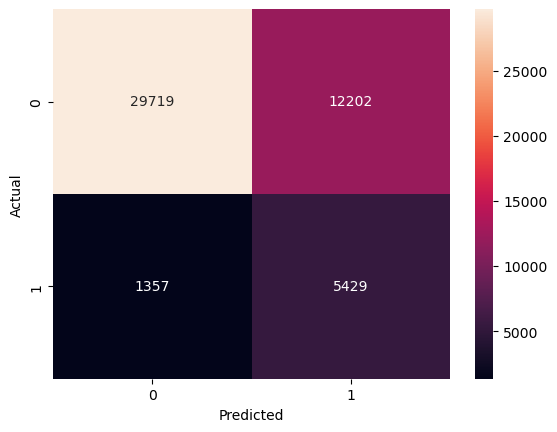

In [101]:
#Plot confusion matrix
plt.figure()
sns.heatmap(cm_xgb, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [102]:
#ROC-AUC score
roc_auc_xgb = roc_auc_score(y_test, y_prob_xgb)
print("XGBoost ROC-AUC:", roc_auc_xgb)

XGBoost ROC-AUC: 0.8323146249158971


In [103]:
#Create comparison table
results = pd.DataFrame({
    "Model": [
        "Logistic Regression (Balanced)",
        "KNN",
        "Decision Tree",
        "Random Forest",
        "Random Forest (Balanced)",
        "XGBoost"
    ],
    "Accuracy": [
        0.7337,
        0.8474,
        0.8660,
        0.8646,
        0.7290,
        0.7216
    ],
    "Recall (Diabetes)": [
        0.77,
        0.19,
        0.14,
        0.06,
        0.78,
        0.80
    ],
    "F1-score (Diabetes)": [
        0.45,
        0.26,
        0.23,
        0.11,
        0.45,
        0.44
    ],
    "ROC-AUC": [
        0.824, 
        0.715,
        0.808,
        0.825,
        0.827,
        0.832
    ]
})
results

,Model,Accuracy,Recall (Diabetes),F1-score (Diabetes),ROC-AUC
0,Logistic Regression (Balanced),0.7337,0.77,0.45,0.824
1,KNN,0.8474,0.19,0.26,0.715
2,Decision Tree,0.8660,0.14,0.23,0.808
3,Random Forest,0.8646,0.06,0.11,0.825
4,Random Forest (Balanced),0.7290,0.78,0.45,0.827
5,XGBoost,0.7216,0.80,0.44,0.832


In [104]:
import matplotlib.pyplot as plt

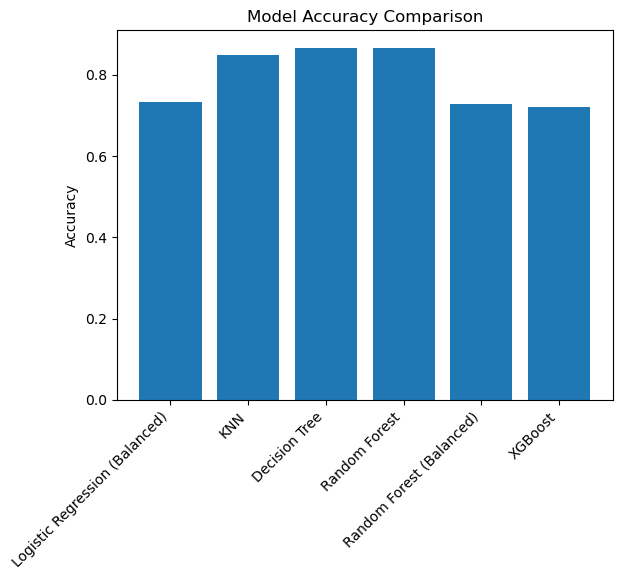

In [105]:
#Plot Model Accuracy Comparison
plt.figure()
plt.bar(results["Model"], results["Accuracy"])
plt.xticks(rotation=45, ha="right")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.show()

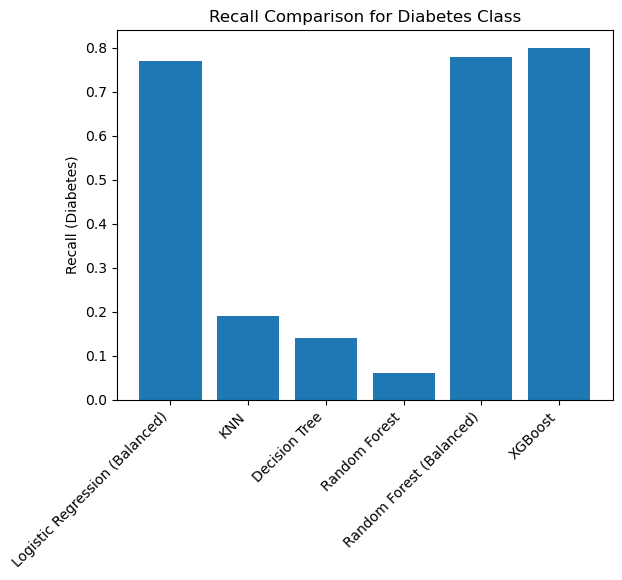

In [106]:
#Plot Model Recall Comparison for Diabetes
plt.figure()
plt.bar(results["Model"], results["Recall (Diabetes)"])
plt.xticks(rotation=45, ha="right")
plt.ylabel("Recall (Diabetes)")
plt.title("Recall Comparison for Diabetes Class")
plt.show()

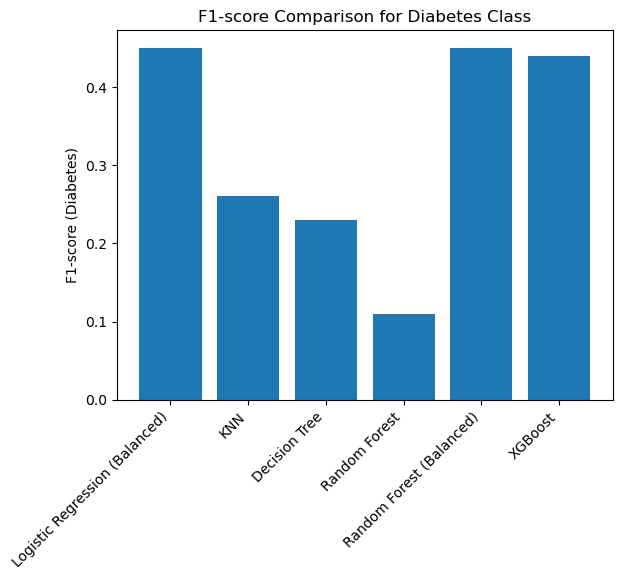

In [107]:
#Plot Model F1-Score Comparison for Diabetes
plt.figure()
plt.bar(results["Model"], results["F1-score (Diabetes)"])
plt.xticks(rotation=45, ha="right")
plt.ylabel("F1-score (Diabetes)")
plt.title("F1-score Comparison for Diabetes Class")
plt.show()


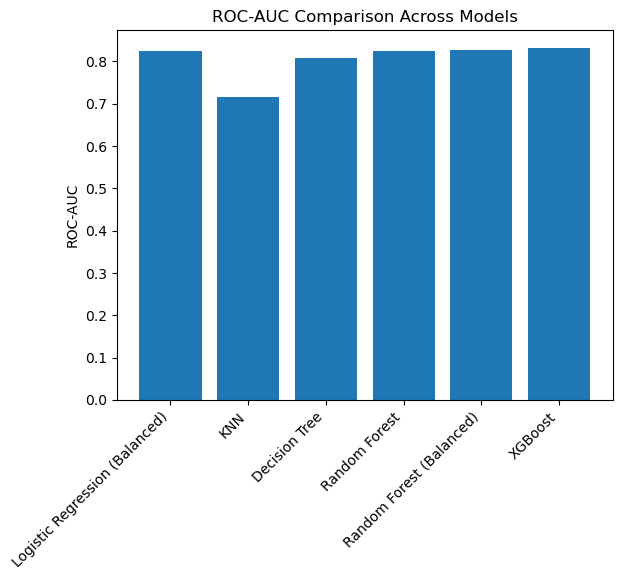

In [108]:
#Plot Model ROC-AUC Score Comparison
roc_results = results.dropna(subset=["ROC-AUC"])
plt.figure()
plt.bar(roc_results["Model"], roc_results["ROC-AUC"])
plt.xticks(rotation=45, ha="right")
plt.ylabel("ROC-AUC")
plt.title("ROC-AUC Comparison Across Models")
plt.show()

In [109]:
#Save feature order for inference
feature_columns = X.columns.tolist()

In [110]:
age_mapping = {
    "18 to 24": 1,
    "25 to 29": 2,
    "30 to 34": 3,
    "35 to 39": 4,
    "40 to 44": 5,
    "45 to 49": 6,
    "50 to 54": 7,
    "55 to 59": 8,
    "60 to 64": 9,
    "65 or older": 10
}

In [111]:
education_mapping = {
    1: 1,  # Never attended school / Kindergarten
    2: 2,  # Elementary
    3: 3,  # Some high school
    4: 4,  # High school graduate
    5: 5,  # Some college
    6: 6   # College graduate
}

In [112]:
income_mapping = {
    1: 1,
    2: 2,
    3: 3,
    4: 4,
    5: 5,
    6: 6,
    7: 7,
    8: 8,
    9: 9,   # Don't know / Refused
    10: 10  # Don't know / Refused
}

In [113]:
def predict_diabetes_new_data(
    model,
    prediction_data,
    age_mapping,
    education_mapping,
    income_mapping,
    feature_columns
):
    """
    Predict diabetes risk for a new data (not in dataset).
    """
    
    import pandas as pd

    #Convert data to DataFrame
    df = pd.DataFrame([prediction_data])

    #Apply mappings
    df["Age"] = df["Age"].map(age_mapping)
    df["Education"] = df["Education"].map(education_mapping)

    #Handle Income and Income_Unknown
    df["Income_Unknown"] = df["Income"].apply(
        lambda x: 1 if x in [9, 10] else 0
    )

    #Drop raw Income if it was dropped during training
    if "Income" not in feature_columns:
        df = df.drop(columns=["Income"])

    #Align columns (fill missing with 0)
    df = df.reindex(columns=feature_columns, fill_value=0)

    #Predict
    prediction = model.predict(df)[0]
    probability = model.predict_proba(df)[0][1]

    #Interpret risk
    if probability < 0.3:
        risk_level = "Low Risk"
    elif probability < 0.6:
        risk_level = "Moderate Risk"
    else:
        risk_level = "High Risk"

    return {
        "diabetes_prediction": int(prediction),
        "risk_probability": round(probability, 4),
        "risk_level": risk_level
    }


In [117]:
prediction_1 = {
    "BMI": 27.5,
    "PhysHlth": 2,
    "Age": "45 to 49",
    "HighBP": 1,
    "HighChol": 0,
    "CholCheck": 1,
    "Smoker": 1,
    "Stroke": 0,
    "HeartDiseaseorAttack": 0,
    "PhysActivity": 1,
    "Fruits": 0,
    "Veggies": 1,
    "HvyAlcoholConsump": 0,
    "AnyHealthcare": 1,
    "NoDocbcCost": 0,
    "GenHlth": 3,
    "MentHlth": 0,
    "DiffWalk": 0,
    "Sex": 1,
    "Education": 4,
    "Income": 6
}

result = predict_diabetes_new_data(
    model=xgb,
    prediction_data=prediction_1,
    age_mapping=age_mapping,
    education_mapping=education_mapping,
    income_mapping=income_mapping,
    feature_columns=feature_columns
)

print(result)

{'diabetes_prediction': 0, 'risk_probability': np.float32(0.4681), 'risk_level': 'Moderate Risk'}


In [119]:
prediction_2 = {
    "BMI": 25.4,
    "PhysHlth": 8,
    "Age": "18 to 24",
    "HighBP": 0,
    "HighChol": 0,
    "CholCheck": 0,
    "Smoker": 0,
    "Stroke": 0,
    "HeartDiseaseorAttack": 0,
    "PhysActivity": 0,
    "Fruits": 0,
    "Veggies": 1,
    "HvyAlcoholConsump": 0,
    "AnyHealthcare": 1,
    "NoDocbcCost": 0,
    "GenHlth": 3,
    "MentHlth": 2,
    "DiffWalk": 1,
    "Sex": 1,
    "Education": 5,
    "Income": 3
}

result = predict_diabetes_new_data(
    model=log_reg_bal,
    prediction_data=prediction_2,
    age_mapping=age_mapping,
    education_mapping=education_mapping,
    income_mapping=income_mapping,
    feature_columns=feature_columns
)

print(result)

{'diabetes_prediction': 0, 'risk_probability': np.float64(0.0557), 'risk_level': 'Low Risk'}


In [131]:
prediction_3 = {
    "BMI": 23.8,
    "PhysHlth": 0,
    "Age": "50 to 54",
    "HighBP": 1,
    "HighChol": 0,
    "CholCheck": 1,
    "Smoker": 0,
    "Stroke": 0,
    "HeartDiseaseorAttack": 0,
    "PhysActivity": 4,
    "Fruits": 0,
    "Veggies": 1,
    "HvyAlcoholConsump": 0,
    "AnyHealthcare": 1,
    "NoDocbcCost": 0,
    "GenHlth": 3,
    "MentHlth": 0,
    "DiffWalk": 0,
    "Sex": 0,
    "Education": 6,
    "Income": 4
}

result = predict_diabetes_new_data(
    model=rf_bal,
    prediction_data=prediction_3,
    age_mapping=age_mapping,
    education_mapping=education_mapping,
    income_mapping=income_mapping,
    feature_columns=feature_columns
)

print(result)

{'diabetes_prediction': 0, 'risk_probability': np.float64(0.4813), 'risk_level': 'Moderate Risk'}
